In [ ]:
"""Fashion-MNIST dataset."""

import gzip
import os
import random
import numpy as np
from google.colab.patches import cv2_imshow
from keras.src.api_export import keras_export
from keras.src.utils.file_utils import get_file
from keras.datasets import fashion_mnist
from tensorflow import keras
from tensorflow.keras import layers
from PIL import Image
import matplotlib.pyplot as plt
import cv2

@keras_export("keras.datasets.fashion_mnist.load_data")
def load_data():
    """Loads the Fashion-MNIST dataset.

    This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
    along with a test set of 10,000 images. This dataset can be used as
    a drop-in replacement for MNIST.

    The classes are:

    | Label | Description |
    |:-----:|-------------|
    |   0   | T-shirt/top |
    |   1   | Trouser     |
    |   2   | Pullover    |
    |   3   | Dress       |
    |   4   | Coat        |
    |   5   | Sandal      |
    |   6   | Shirt       |
    |   7   | Sneaker     |
    |   8   | Bag         |
    |   9   | Ankle boot  |

    Returns:

    Tuple of NumPy arrays: `(train_images, train_labels), (test_images, test_labels)`.

    **`train_images`**: `uint8` NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data.

    **`train_labels`**: `uint8` NumPy array of labels (integers in range 0-9)
      with shape `(60000,)` for the training data.

    **`test_images`**: `uint8` NumPy array of grayscale image data with shapes
      (10000, 28, 28), containing the test data.

    **`test_labels`**: `uint8` NumPy array of labels (integers in range 0-9)
      with shape `(10000,)` for the test data.

    Example:

    ```python
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
    assert train_images.shape == (60000, 28, 28)
    assert test_images.shape == (10000, 28, 28)
    assert train_labels.shape == (60000,)
    assert test_labels.shape == (10000,)
    ```

    License:

    The copyright for Fashion-MNIST is held by Zalando SE.
    Fashion-MNIST is licensed under the [MIT license](
        https://github.com/zalandoresearch/fashion-mnist/blob/master/LICENSE).
    """
    dirname = os.path.join("datasets", "fashion-mnist")
    base = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/"
    files = [
        "train-labels-idx1-ubyte.gz",
        "train-images-idx3-ubyte.gz",
        "t10k-labels-idx1-ubyte.gz",
        "t10k-images-idx3-ubyte.gz",
    ]

    paths = []
    for fname in files:
        paths.append(get_file(fname, origin=base + fname, cache_subdir=dirname))

    with gzip.open(paths[0], "rb") as lbpath:
        train_labels = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(paths[1], "rb") as imgpath:
        train_images = np.frombuffer(imgpath.read(), np.uint8, offset=16).reshape(
            len(train_labels), 28, 28
        )

    with gzip.open(paths[2], "rb") as lbpath:
        test_labels = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(paths[3], "rb") as imgpath:
        test_images = np.frombuffer(imgpath.read(), np.uint8, offset=16).reshape(
            len(test_labels), 28, 28
        )

    return (train_images, train_labels), (test_images, test_labels)

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
assert train_images.shape == (60000, 28, 28)
assert test_images.shape == (10000, 28, 28)
assert train_labels.shape == (60000,)
assert test_labels.shape == (10000,)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#Aplicando o filtro de Pré-Processamento

# Function to apply unsharp masking and high-boost filtering
def umhb_filter(image, amount=1.0):
    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(image, (0, 0), 3)

    # Calculate the difference between the original and blurred images
    sharpened = float(amount + 1) * image - float(amount) * blurred

    # Clip values to the valid range [0, 255]
    sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)

    return sharpened

# Create a new dataset with sharpened images
train_images_sharpened = np.array([umhb_filter(img, amount=1.0) for img in train_images])
test_images_sharpened = np.array([umhb_filter(img, amount=1.0) for img in test_images])

# Select an image from the dataset
image_index = 10  # You can change this index to see different images
original_image = train_images[image_index]

# Display random images from both datasets for comparison

# Random index for original dataset
random_index = random.randint(0, len(train_images) - 1)

# Display original image
print("Original Image")
cv2_imshow(train_images[random_index])

# Display sharpened image
print("Sharpened Image")
cv2_imshow(train_images_sharpened[random_index])

Original Image


Sharpened Image


In [ ]:
# Upscale function
def upscale_image(image, scale_factor=4):
    img = Image.fromarray(image.astype(np.uint8))
    width, height = img.size
    new_size = (width * scale_factor, height * scale_factor)
    upscaled_img = img.resize(new_size, Image.Resampling.BICUBIC) # or Image.LANCZOS
    return np.array(upscaled_img)

Original train_images shape: (60000, 28, 28)
Upscaled train_images shape: (60000, 112, 112)
Original(Sharpened Image)


Upscaled Image


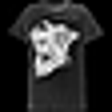

In [ ]:
# Create a new dataset with upscaled images without filter
train_images_upscaled = np.array([upscale_image(img) for img in train_images])

# Print shapes to verify
print("Original train_images shape:", train_images.shape)
print("Upscaled train_images shape:", train_images_upscaled.shape)

# Display random images from both datasets for a simple comparison
# Random index for datasets
random_index = random.randint(0, len(train_images) - 1)

print("Original(Sharpened Image)")
cv2_imshow(train_images[random_index])
print("Upscaled Image")
cv2_imshow(train_images_upscaled[random_index])

Original train_images shape: (60000, 28, 28)
Upscaled train_images shape: (60000, 112, 112)
Original(Sharpened Image)


Upscaled Image


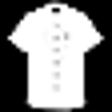

In [ ]:
# Create a new dataset with upscaled images with filter
train_images_sharp_upscaled = np.array([upscale_image(img) for img in train_images_sharpened])
test_images_sharp_upscaled = np.array([upscale_image(img) for img in test_images_sharpened])

# Print shapes to verify
print("Original train_images shape:", train_images.shape)
print("Upscaled train_images shape:", train_images_sharp_upscaled.shape)

# Display random images from both datasets for a simple comparison
# Random index for datasets
random_index = random.randint(0, len(train_images) - 1)

print("Original(Sharpened Image)")
cv2_imshow(train_images_sharpened[random_index])
print("Upscaled Image")
cv2_imshow(train_images_sharp_upscaled[random_index])

In [ ]:
def make_model(sp = 28):
    model = keras.Sequential(
      [
       keras.Input(shape=(sp,sp)),
       layers.Rescaling(scale=1/255),
       layers.Reshape((dim_x, dim_y, dim_z)),
       layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
       layers.MaxPooling2D(pool_size=(2, 2)),
       layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
       layers.MaxPooling2D(pool_size=(2, 2)),
       layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
       layers.MaxPooling2D(pool_size=(2, 2)),
       layers.Dropout(0.3),
       layers.Flatten(),
       layers.Dense(128, activation='relu'), #using 128 to get the same number of neurons of last Conv2D Layer
       layers.Dense(10, activation='softmax'),
      ]
      )
    return model

In [ ]:
image_val = train_images[55000:]
label_val = train_labels[55000:]
print(train_images.dtype)
print("Train shapes: ", train_images.shape)
print(image_val.dtype)
print("Val shapes: ",image_val.shape)
print(test_images.dtype)
print("Test shapes: ",test_images.shape)
print(test_images.shape[0])
#num_classes = 10

#train_labels = keras.utils.to_categorical(train_labels, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

dim_x, dim_y, dim_z = 28,28,1
size_train = train_images[0]

make_model().summary()

#tf.random.set_seed(0)
model_raw = make_model()
model_raw.compile(optimizer=keras.optimizers.Adam(0.001),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

uint8
Train shapes:  (60000, 28, 28)
uint8
Val shapes:  (5000, 28, 28)
uint8
Test shapes:  (10000, 28, 28)
10000


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_2 (Reshape)                  │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,474 (431.54 KB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_raw = model_raw.fit(train_images[:55000], train_labels[:55000], epochs=20, batch_size=32, validation_data=(image_val, label_val))

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6842 - loss: 0.8561 - val_accuracy: 0.8408 - val_loss: 0.4325
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8294 - loss: 0.4698 - val_accuracy: 0.8608 - val_loss: 0.3693
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8559 - loss: 0.3906 - val_accuracy: 0.8716 - val_loss: 0.3376
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8744 - loss: 0.3452 - val_accuracy: 0.8662 - val_loss: 0.3419
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8829 - loss: 0.3148 - val_accuracy: 0.8840 - val_loss: 0.3044
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8896 - loss: 0.2965 - val_accuracy: 0.8894 - val_loss: 0.2903
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8955 - loss: 0.2782 - val_accuracy: 0.8948 - val_loss: 0.2787
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9030 - loss: 0.2641 -

In [ ]:
image_val2 = train_images_sharpened[55000:]
label_val2 = train_labels[55000:]
print(train_images_sharpened.dtype)
print("Train shapes: ", train_images_sharpened.shape)
print(image_val2.dtype)
print("Val shapes: ",image_val2.shape)
print(test_images_sharpened.dtype)
print("Test shapes: ",test_images_sharpened.shape)
print(test_images_sharpened.shape[0])
#num_classes = 10

#train_labels = keras.utils.to_categorical(train_labels, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

dim_x, dim_y, dim_z = 28,28,1
size_train = train_images_sharpened[0]

make_model().summary()

#tf.random.set_seed(0)
model_sharpened = make_model()
model_sharpened.compile(optimizer=keras.optimizers.Adam(0.001),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


uint8
Train shapes:  (60000, 28, 28)
uint8
Val shapes:  (5000, 28, 28)
uint8
Test shapes:  (10000, 28, 28)
10000


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)              │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_6 (Reshape)                  │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,474 (431.54 KB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_sharpened = model_sharpened.fit(train_images_sharpened[:55000], train_labels[:55000], epochs=20, batch_size=32, validation_data=(image_val2, label_val2))

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6950 - loss: 0.8408 - val_accuracy: 0.8346 - val_loss: 0.4456
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8360 - loss: 0.4532 - val_accuracy: 0.8642 - val_loss: 0.3663
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8615 - loss: 0.3830 - val_accuracy: 0.8654 - val_loss: 0.3501
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8748 - loss: 0.3371 - val_accuracy: 0.8796 - val_loss: 0.3233
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8833 - loss: 0.3133 - val_accuracy: 0.8748 - val_loss: 0.3394
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8897 - loss: 0.2969 - val_accuracy: 0.8860 - val_loss: 0.3163
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8934 - loss: 0.2842 - val_accuracy: 0.8866 - val_loss: 0.2965
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9027 - loss: 0.2623 -

In [ ]:
image_val3 = train_images_upscaled[55000:]
label_val3 = train_labels[55000:]
print(train_images_upscaled.dtype)
print("Train shapes: ", train_images_upscaled.shape)
print(image_val3.dtype)
print("Val shapes: ",image_val3.shape)
print(test_images_sharp_upscaled.dtype)
print("Test shapes: ",test_images_sharp_upscaled.shape)
print(test_images_sharp_upscaled.shape[0])
#num_classes = 10

#train_labels = keras.utils.to_categorical(train_labels, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

dim_x, dim_y, dim_z = 112,112,1
size_train = train_images_upscaled[0]

make_model(112).summary()

#tf.random.set_seed(0)
model_upscaled = make_model(112)
model_upscaled.compile(optimizer=keras.optimizers.Adam(0.001),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

uint8
Train shapes:  (60000, 112, 112)
uint8
Val shapes:  (5000, 112, 112)
uint8
Test shapes:  (10000, 112, 112)
10000


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 112, 112)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 112, 112, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 110, 110, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 55, 55, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 53, 53, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,359,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,453,386 (9.36 MB)

 Trainable params: 2,453,386 (9.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_upscaled = model_upscaled.fit(train_images_upscaled[:55000], train_labels[:55000], epochs=20, batch_size=32, validation_data=(image_val3, label_val3))

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.8219 - loss: 0.4994 - val_accuracy: 0.8944 - val_loss: 0.2816
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 36s 11ms/step - accuracy: 0.9040 - loss: 0.2596 - val_accuracy: 0.9118 - val_loss: 0.2355
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9284 - loss: 0.1946 - val_accuracy: 0.9234 - val_loss: 0.2150
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9400 - loss: 0.1585 - val_accuracy: 0.9186 - val_loss: 0.2149
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9525 - loss: 0.1273 - val_accuracy: 0.9166 - val_loss: 0.2413
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9632 - loss: 0.0993 - val_accuracy: 0.9218 - val_loss: 0.2295
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9689 - loss: 0.0819 - val_accuracy: 0.9246 - val_loss: 0.2475
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9742 -

In [ ]:
image_val4 = train_images_sharp_upscaled[55000:]
label_val4 = train_labels[55000:]
print(train_images_sharp_upscaled.dtype)
print("Train shapes: ", train_images_sharp_upscaled.shape)
print(image_val4.dtype)
print("Val shapes: ",image_val4.shape)
print(test_images_sharp_upscaled.dtype)
print("Test shapes: ",test_images_sharp_upscaled.shape)
print(test_images_sharp_upscaled.shape[0])
#num_classes = 10

#train_labels = keras.utils.to_categorical(train_labels, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

dim_x, dim_y, dim_z = 112,112,1
size_train = train_images_sharp_upscaled[0]

make_model(112).summary()

#tf.random.set_seed(0)
model_sharp_upscaled = make_model(112)
model_sharp_upscaled.compile(optimizer=keras.optimizers.Adam(0.001),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

uint8
Train shapes:  (60000, 112, 112)
uint8
Val shapes:  (5000, 112, 112)
uint8
Test shapes:  (10000, 112, 112)
10000


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_8 (Rescaling)              │ (None, 112, 112)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_8 (Reshape)                  │ (None, 112, 112, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 110, 110, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 55, 55, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 53, 53, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │       2,359,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,453,386 (9.36 MB)

 Trainable params: 2,453,386 (9.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_sharp_upscaled = model_sharp_upscaled.fit(train_images_sharp_upscaled[:55000], train_labels[:55000], epochs=20, batch_size=32, validation_data=(image_val4, label_val4))

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.8203 - loss: 0.5035 - val_accuracy: 0.9002 - val_loss: 0.2746
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 38s 11ms/step - accuracy: 0.9066 - loss: 0.2517 - val_accuracy: 0.9074 - val_loss: 0.2465
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9279 - loss: 0.1937 - val_accuracy: 0.9132 - val_loss: 0.2319
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9465 - loss: 0.1424 - val_accuracy: 0.9182 - val_loss: 0.2328
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9574 - loss: 0.1135 - val_accuracy: 0.9218 - val_loss: 0.2315
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9661 - loss: 0.0878 - val_accuracy: 0.9174 - val_loss: 0.2696
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9736 - loss: 0.0704 - val_accuracy: 0.9144 - val_loss: 0.3045
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9787 -

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Aplicação de teste

In [ ]:
def plot_accuracy(history, model, test_images):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')

    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

def predict_image(model, test_labels, test_images, num_image):
    plt.imshow(test_images[num_image])
    plt.xlabel(class_names[test_labels[num_image]])
    plt.show()
    image2test = test_images[num_image]
    image2test = image2test.reshape((-1,28, 28,1))
    result = model.predict(image2test)
    print(result)
    print("\n\nResultado = ", class_names[np.argmax(result)], "Valor = ", result[0][np.argmax(result)])

def predict_image2(model, test_labels, test_images, num_image):
    """
    Displays an image, predicts its class using the model, and prints the result.
    """
    plt.imshow(test_images[num_image])
    plt.xlabel(class_names[test_labels[num_image]])
    plt.show()
    image2test = test_images[num_image]

    # Reshape the image to (1, image_height, image_width, 1)
    # We determine the height and width dynamically based on the input image size.
    image_height, image_width = image2test.shape[:2] # Get image height and width
    image2test = image2test.reshape((1, image_height, image_width, 1))

    result = model.predict(image2test)
    print(result)
    print("\n\nResultado = ", class_names[np.argmax(result)], "Valor = ", result[0][np.argmax(result)])

Aplicação - Sharpening no teste

313/313 - 0s - 1ms/step - accuracy: 0.8791 - loss: 0.4082


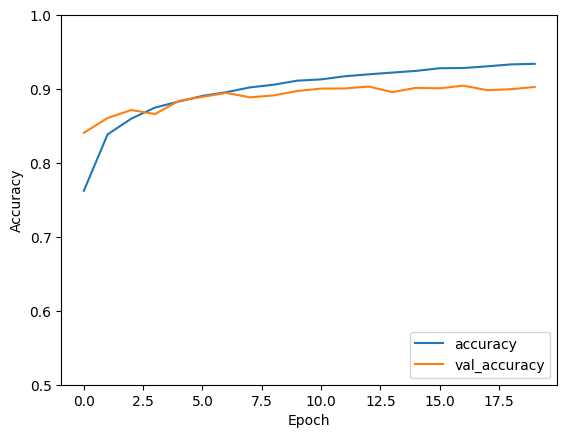

In [ ]:
plot_accuracy(history_raw, model_raw, test_images_sharpened)

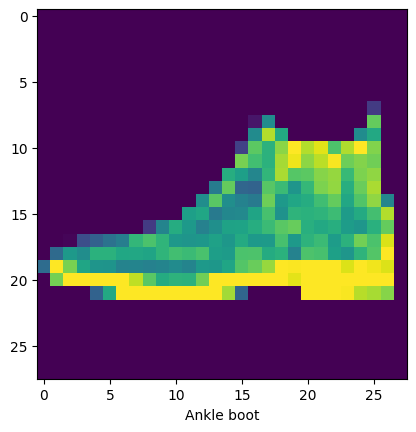

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[4.2461069e-11 1.9703399e-13 1.5618722e-13 1.0966431e-12 9.9176811e-14
  4.1661653e-07 2.6611022e-11 2.8639646e-05 6.8044381e-12 9.9997091e-01]]


Resultado =  Ankle boot Valor =  0.9999709


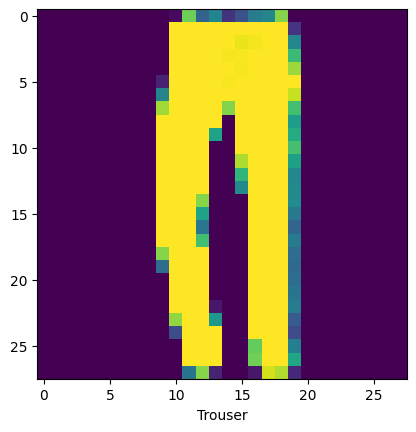

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[6.4473704e-11 1.0000000e+00 4.4600291e-15 8.8718963e-14 4.3275604e-15
  5.5052023e-20 1.2674847e-14 1.0470327e-21 2.5635409e-18 2.1791092e-21]]


Resultado =  Trouser Valor =  1.0


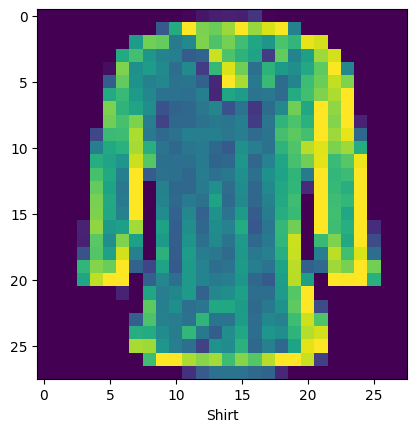

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[1.04582027e-01 1.33023495e-05 8.18468689e-04 1.00075849e-03
  3.16574007e-01 9.69845289e-08 5.76992989e-01 2.00002170e-09
  1.83167758e-05 5.82466519e-08]]


Resultado =  Shirt Valor =  0.576993


In [ ]:
'''
num_image = 7
plt.imshow(test_images_sharpened[num_image])
plt.xlabel(class_names[test_labels[num_image]])
plt.show()
image2test = test_images_sharpened[num_image]
image2test = image2test.reshape((-1,28, 28,1))
print(model_sharpened.predict(image2test))'''

predict_image(model_raw, test_labels, test_images_sharpened, 0)
predict_image(model_raw, test_labels, test_images_sharpened, 2)
predict_image(model_raw, test_labels, test_images_sharpened, 4)

Aplicação - Sharpening em ambos

313/313 - 0s - 1ms/step - accuracy: 0.8908 - loss: 0.3492


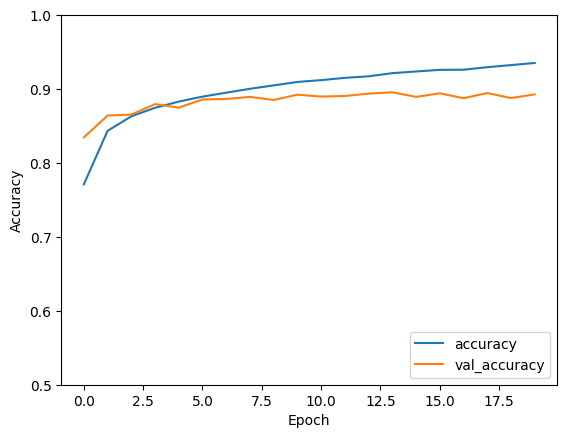

In [ ]:
plot_accuracy(history_sharpened, model_sharpened, test_images_sharpened)

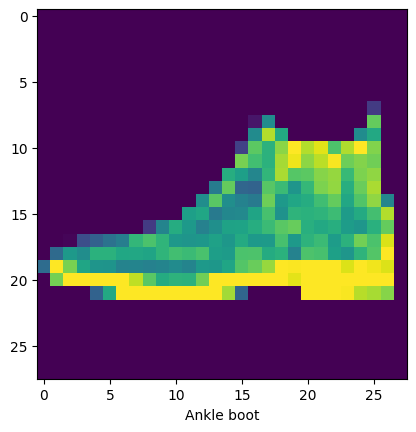

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
[[6.2255747e-12 2.2904377e-14 7.3007811e-15 1.2390845e-10 1.7275620e-10
  7.0164184e-08 9.4296404e-11 3.8756995e-04 1.0295060e-11 9.9961239e-01]]


Resultado =  Ankle boot Valor =  0.9996124


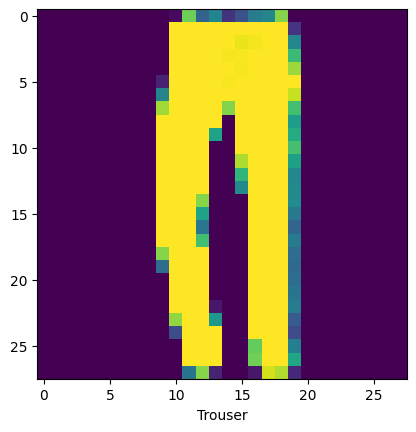

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[4.2924354e-18 1.0000000e+00 2.8610587e-18 2.5384926e-18 1.5919185e-21
  4.3891477e-27 1.8337802e-17 9.4305071e-30 2.3225386e-19 4.3393556e-26]]


Resultado =  Trouser Valor =  1.0


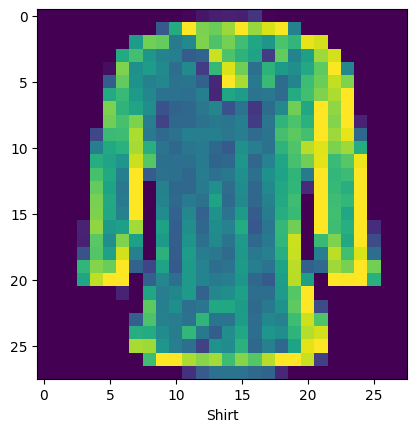

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[4.7160010e-03 2.9116205e-08 1.0660586e-04 3.3097345e-05 2.0326022e-04
  1.1621072e-13 9.9494100e-01 3.1597198e-16 5.8350214e-11 5.9724618e-14]]


Resultado =  Shirt Valor =  0.994941


In [ ]:
predict_image(model_sharpened, test_labels, test_images_sharpened, 0)
predict_image(model_sharpened, test_labels, test_images_sharpened, 2)
predict_image(model_sharpened, test_labels, test_images_sharpened, 4)

Aplicação - Upscaled - Sharpening no teste

313/313 - 2s - 5ms/step - accuracy: 0.9062 - loss: 0.7402


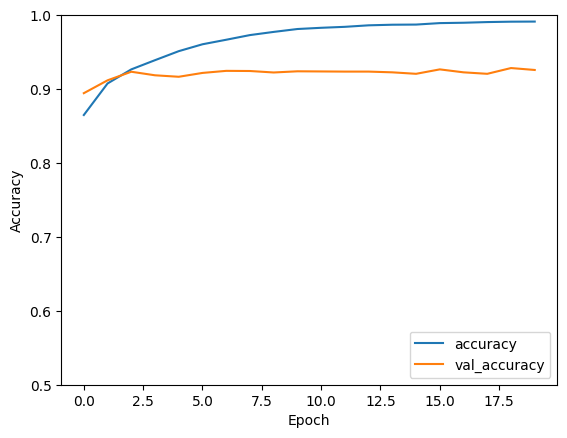

In [ ]:
plot_accuracy(history_upscaled, model_upscaled, test_images_sharp_upscaled)

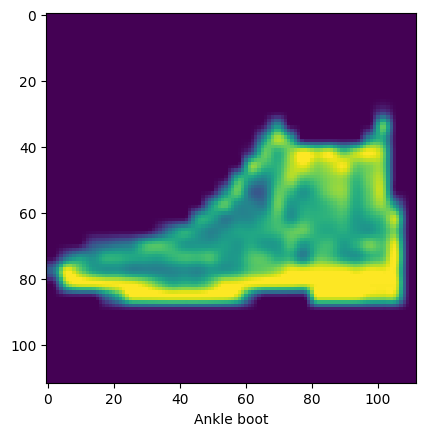

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[8.2384329e-23 6.7215080e-28 6.1458519e-29 4.0570950e-22 7.9403910e-26
  1.0272856e-12 7.5017605e-28 4.0478083e-20 5.8774661e-41 1.0000000e+00]]


Resultado =  Ankle boot Valor =  1.0


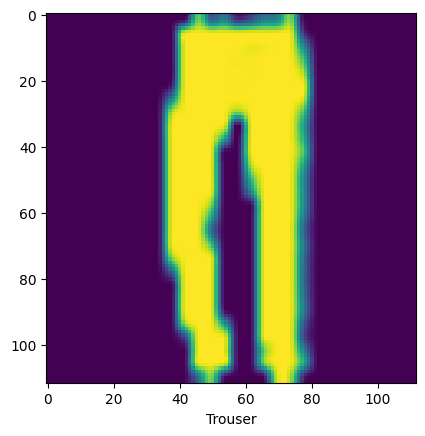

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[8.8183263e-34 1.0000000e+00 4.8316130e-37 1.0656890e-30 1.7598109e-34
  7.0064923e-45 6.7110295e-28 0.0000000e+00 4.1273346e-25 0.0000000e+00]]


Resultado =  Trouser Valor =  1.0


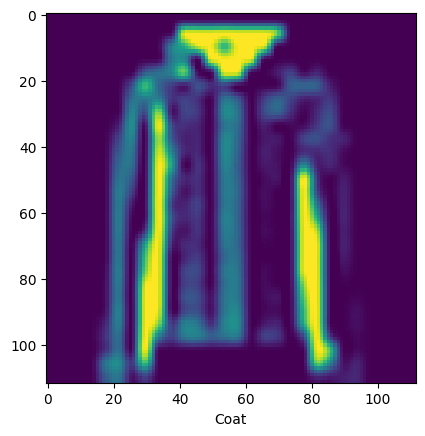

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[4.3401407e-19 7.1889191e-13 1.1342937e-03 7.6312028e-19 9.9886572e-01
  8.9769896e-25 8.7742140e-12 9.1033837e-31 3.4702826e-26 2.0381956e-22]]


Resultado =  Coat Valor =  0.9988657


In [ ]:
'''
plt.imshow(test_images_upscaled[num_image])
plt.xlabel(class_names[test_labels[num_image][0]])
plt.show()
image2test = test_images_upscaled[num_image]
image2test = image2test.reshape((-1,32,32,3))
print(model_upscaled.predict(image2test))
'''

predict_image2(model_upscaled, test_labels, test_images_sharp_upscaled, 0)
predict_image2(model_upscaled, test_labels, test_images_sharp_upscaled, 2)
predict_image2(model_upscaled, test_labels, test_images_sharp_upscaled, 6)

Aplicação - Upscaled - Sharpening em ambos

313/313 - 1s - 4ms/step - accuracy: 0.9173 - loss: 0.5359


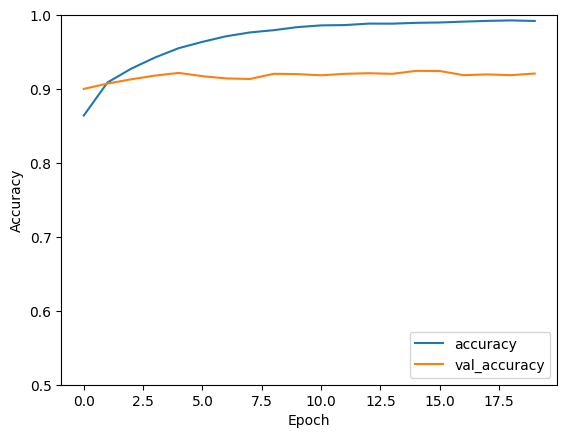

In [ ]:
plot_accuracy(history_sharp_upscaled, model_sharp_upscaled, test_images_sharp_upscaled)

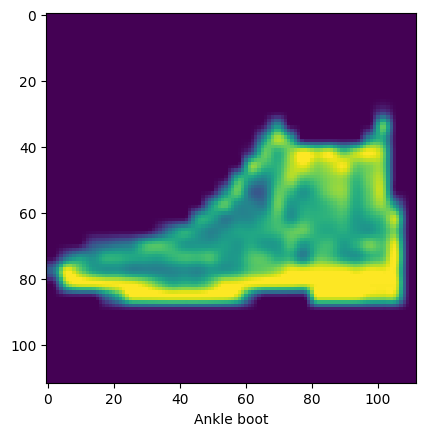

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[1.4234673e-23 3.6140425e-25 2.9822089e-27 3.4428737e-35 2.3200473e-29
  7.0216608e-18 5.9428673e-31 2.3189490e-15 5.6778769e-20 1.0000000e+00]]


Resultado =  Ankle boot Valor =  1.0


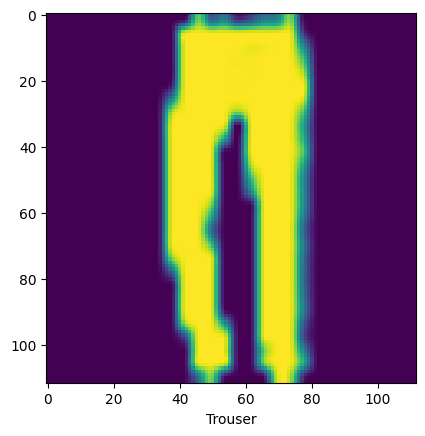

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[2.1010193e-25 1.0000000e+00 4.3162944e-25 2.9567096e-28 7.7528624e-36
  1.2556669e-34 5.1012460e-25 2.7227267e-35 1.8079840e-23 0.0000000e+00]]


Resultado =  Trouser Valor =  1.0


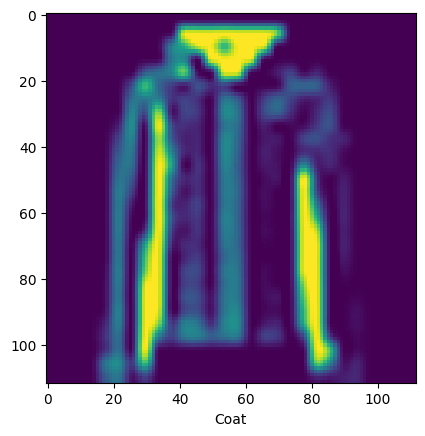

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[1.6591084e-15 7.0945330e-24 4.8677577e-04 1.0328866e-23 9.9951327e-01
  2.2996859e-23 1.3787137e-12 9.5440660e-27 5.7562866e-20 2.9686529e-25]]


Resultado =  Coat Valor =  0.99951327


In [ ]:
predict_image2(model_sharp_upscaled, test_labels, test_images_sharp_upscaled, 0)
predict_image2(model_sharp_upscaled, test_labels, test_images_sharp_upscaled, 2)
predict_image2(model_sharp_upscaled, test_labels, test_images_sharp_upscaled, 6)